<a href="https://colab.research.google.com/github/imYours14/PCVK_Genap_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library yang dibutuhkan:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#akses drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


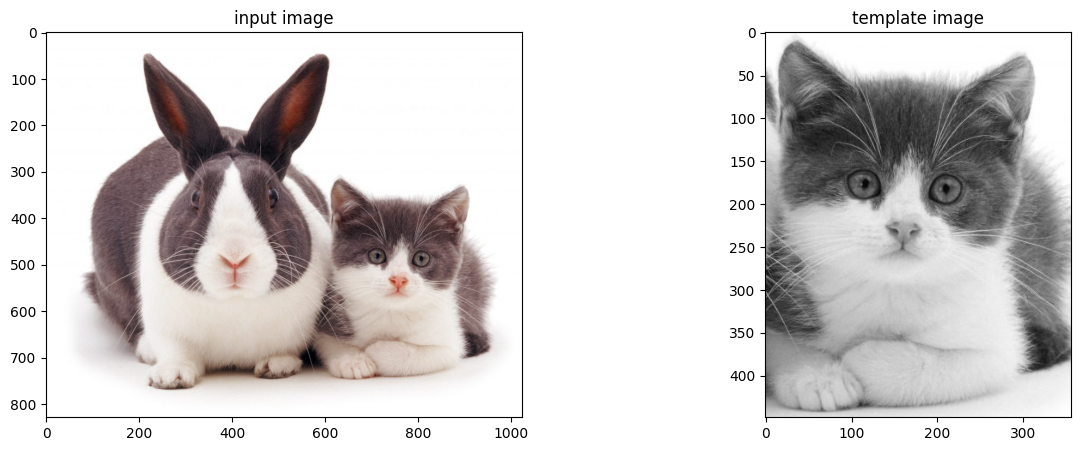

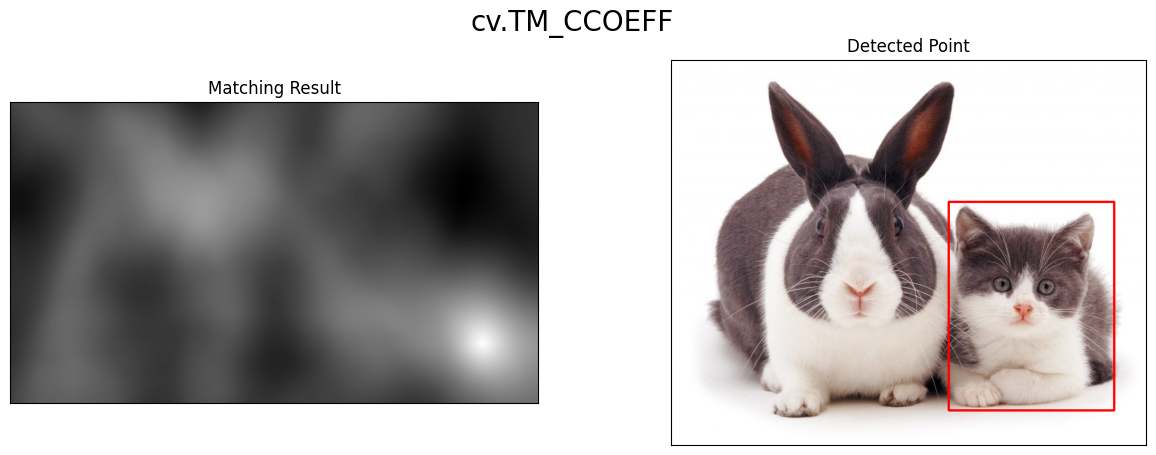

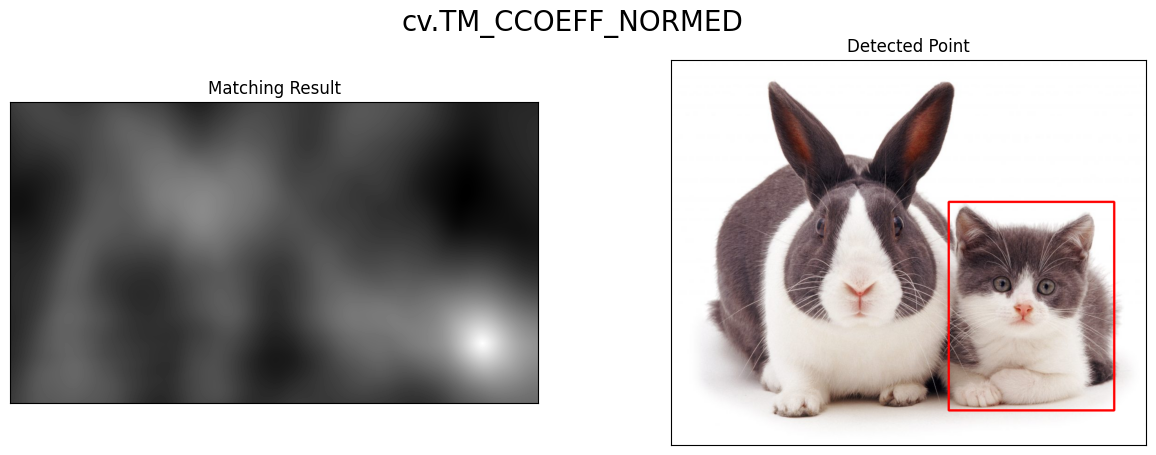

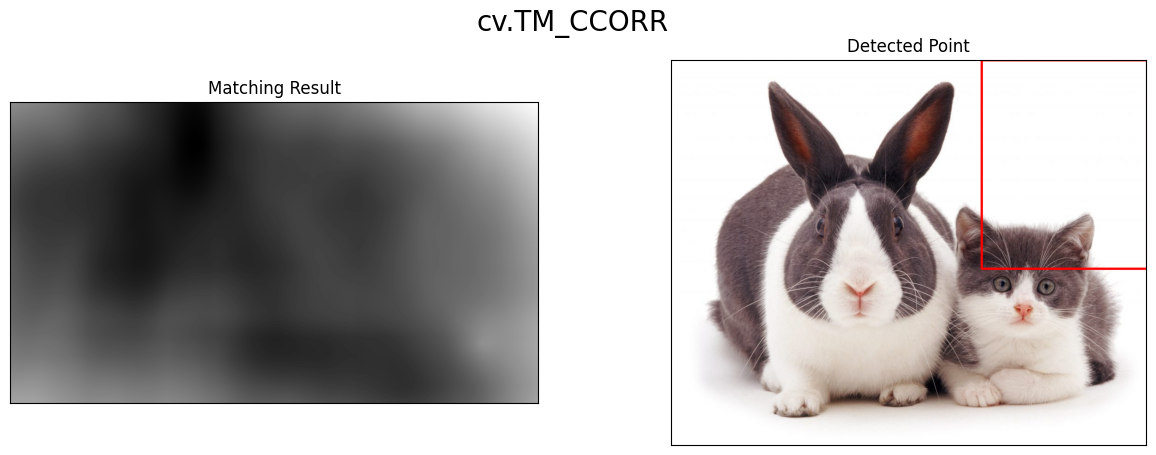

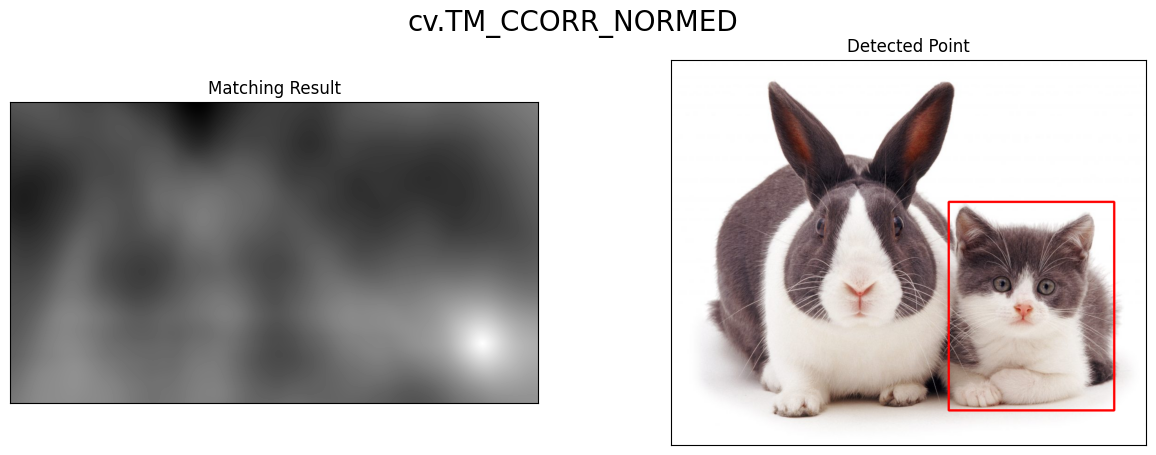

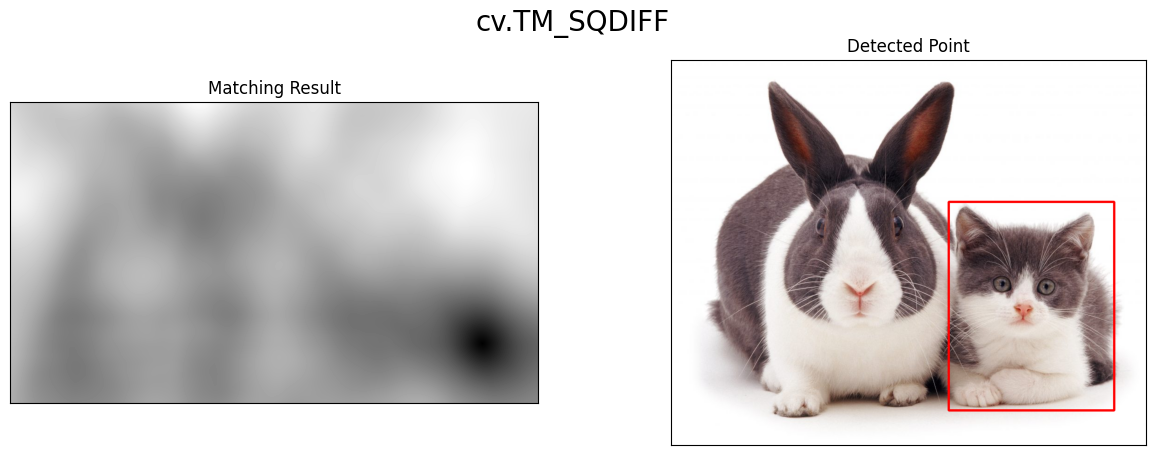

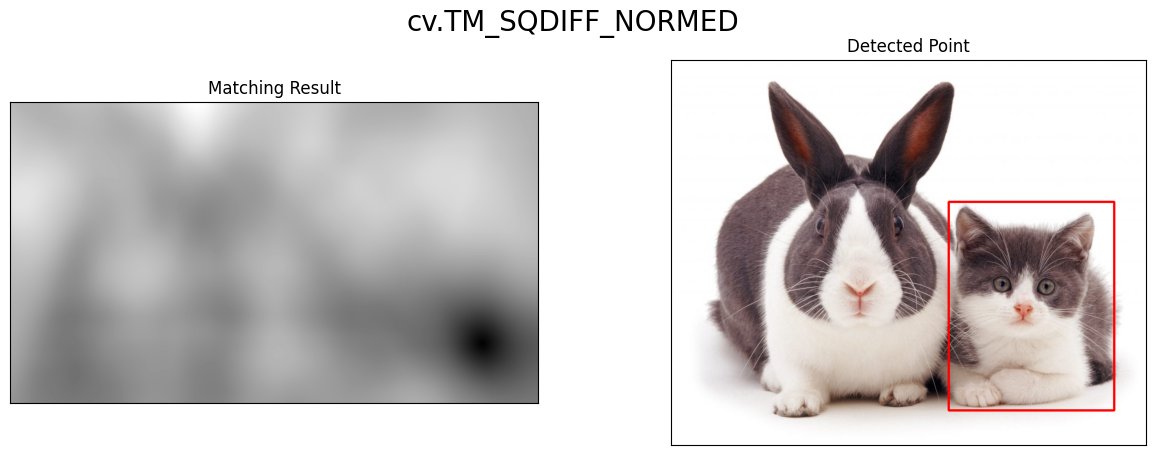

In [4]:
img = cv.imread('/content/drive/MyDrive/PCVK/Week11/cats_and_bunnies.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/PCVK/Week11/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

# Membuat 2 plot untuk citra input dan template 
f, axarr = plt. subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# 6 metode template matching
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img, top_left, bottom_right,(0,0,255),3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

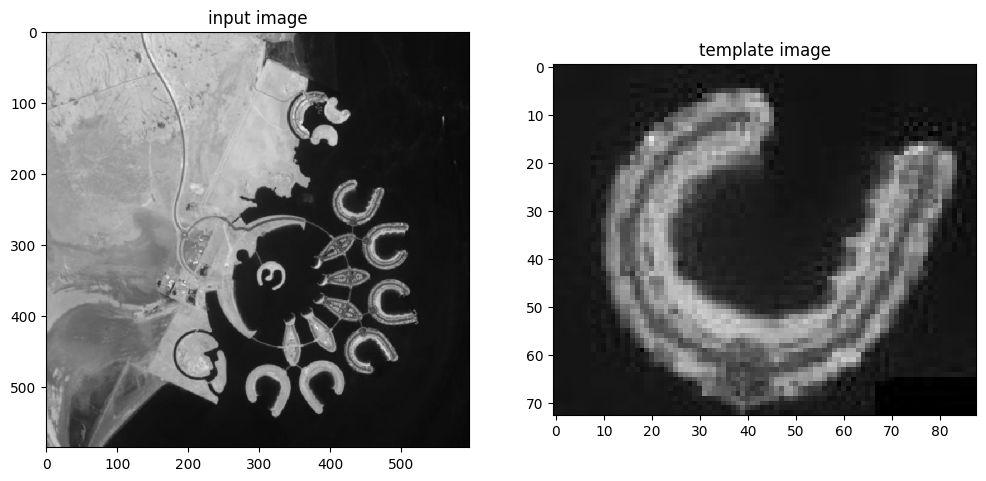

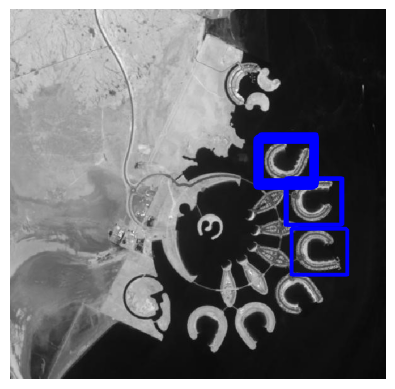

In [10]:
from skimage.feature import match_template

img = cv.imread('/content/drive/MyDrive/PCVK/Week11/bahrain.jpg', 0) 
template = cv.imread('/content/drive/MyDrive/PCVK/Week11/bahrain-template.jpg', 0)

f, axarr = plt. subplots(1,2,figsize=(12,8))
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Hitung kemiripan citra dengan citra template
result = match_template(img, template)

# Tentukan threshold untuk menentukan hasil match
threshold = 0.5
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='blue', facecolor='none', linewidth=1)
    ax.add_patch(rect)
plt.show()

In [16]:
img= cv.imread('/content/drive/MyDrive/PCVK/Week11/car-park.jpg')

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_car = cv.cvtColor(img, cv.COLOR_BGR2RGB)

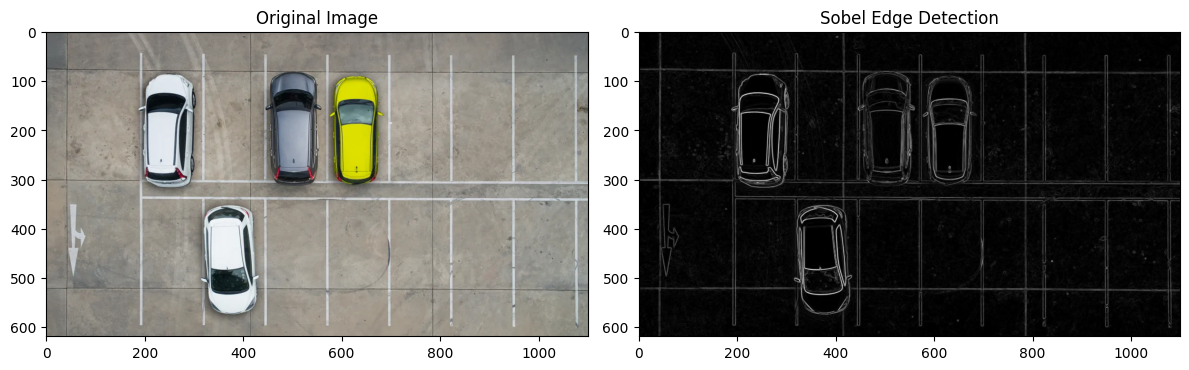

In [17]:
# Sobel Edge Detection
sobel_x = cv.Sobel(img_gray, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img_gray, cv.CV_64F, 0, 1, ksize=3)
sobel_combined = cv.magnitude(sobel_x, sobel_y)

# Tampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_car, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')

plt.tight_layout()
plt.show()